<a href="https://colab.research.google.com/github/davidashirov/uzum_biz_an/blob/main/mnist_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа 7: Знакомство с набором данных MNIST. Построение модели KNeighborsClassifier

### Основы API

Чаще всего использование API Scikit-Learn Estimator происходит следующим образом:

1. Выбирается класс модели, импортировав соответствующий класс из Scikit-Learn.
2. Подбираем значения гиперпараметров модели, инстанцировав класс модели с нужными значениями параметров.
3. Разделение данные на матрицу признаков и целевой вектор.
4. Настройка модели посредством метода `fit` экземпляра модели.
5. Применение модели к новым данным:
   - Для `supervised learning` (обучение с учителем) мы предсказываем метки для неизвестных данных с помощью метода `predict`.
   - Для `unsupervised learning` (обучение без учителя) мы преобразуем или оцениваем свойства примеров из набора данных с помощью методов `transform` или `predict`.

Согласно вышеуказнной последовательность требуется выполнить следующее задание:

1. Загрузить набор данных [MNIST]( http://yann.lecun.com/exdb/mnist/ )
2. Исследовать его. Вывести разнообразные числовые характериcтики набора данных, а также визуализировать отдельные элементы данных.
3. Разработать программный код, который позволит построить модель KNeighborsClassifier
4. Вывести метрики Confusion Matrix, Precision, Recall
5. Описать полученные результаты

Бонус
    На втором семинаре было дано введение в объектно-ориентированное программирование, попробуйте реализовать собственный класс модели.
    Реализация должна поддерживать API Scikit-Learn, что позволит использовать возможности Scikit-Learn


Используем keras для загрузки. Там должно быть все то-же самое.

In [2]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f'{x_train.shape=} {y_train.shape=}')
print(f'{x_test.shape=} {y_test.shape=}')

11490434/11490434 [==============================] - 0s 0us/step
x_train.shape=(60000, 28, 28) y_train.shape=(60000,)
x_test.shape=(10000, 28, 28) y_test.shape=(10000,)


Мы могли бы разделить тренировочный датасет на train, valid, test, но уже есть тестовый и третьего набора в данном случае не нужно.

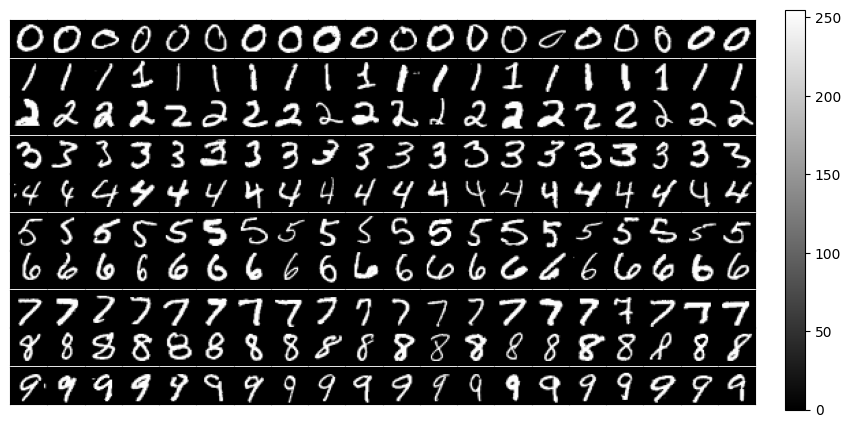

In [3]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=20, nrows=10, sharex=False, sharey=True, figsize=(10, 5))
for digit in range(10):
  for i in range(20):
    digit_images = x_train[y_train==digit,:]
    im = axes[digit, i].imshow(digit_images[np.random.randint(0,digit_images.shape[0])], cmap='gray')
    axes[digit, i].get_xaxis().set_visible(False)
    axes[digit, i].get_yaxis().set_visible(False)

cbar_ax = fig.add_axes([0.9, 0.10, 0.02, 0.8])
fig.colorbar(im, cax=cbar_ax)
plt.subplots_adjust(wspace=0, hspace=0, right=0.87)
plt.margins(0)
plt.show()

Датасет состоит из черно-белых изображений рукописных цифр (0-9) размером 28x28 пикселей. В наборе данных содержится 60 000 обучающих и 10 000 тестовых изображений. Каждое изображение представлено как матрица значений пикселей (0-255).
Мы не будем выпрямлять 28х28 массивы в одномерные чтобы иметь возможность выводить их в графиках

In [4]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train.reshape(x_train.shape[0],-1), y_train)

y_pred = neigh.predict(x_test.reshape(x_test.shape[0],-1))

In [5]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
cm = confusion_matrix(y_pred, y_test)
precision = precision_score(y_pred, y_test, labels=np.arange(10),average=None)
recall = recall_score(y_pred, y_test, labels=np.arange(10),average=None)

In [6]:
for i in range(10):
  cm_copy = np.copy(cm[i])
  cm_copy[i]=0
  freq_confusion=cm_copy.argmax()
  print(f'{i}: precision={precision[i]:.3f}, recall={recall[i]:.3f}. Most freq confused with {freq_confusion}')

0: precision=0.994, recall=0.966. Most freq confused with 2
1: precision=0.998, recall=0.958. Most freq confused with 7
2: precision=0.965, recall=0.982. Most freq confused with 7
3: precision=0.966, recall=0.963. Most freq confused with 8
4: precision=0.967, recall=0.975. Most freq confused with 9
5: precision=0.963, recall=0.966. Most freq confused with 3
6: precision=0.985, recall=0.983. Most freq confused with 5
7: precision=0.964, recall=0.965. Most freq confused with 2
8: precision=0.938, recall=0.989. Most freq confused with 3
9: precision=0.959, recall=0.960. Most freq confused with 4


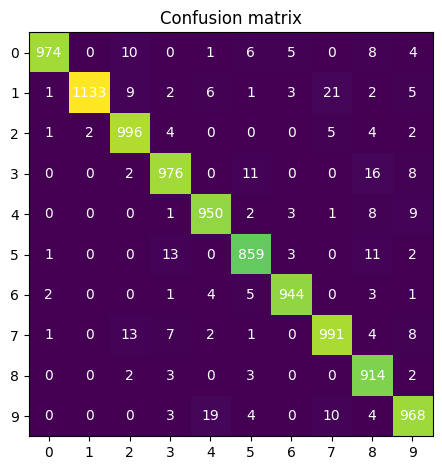

In [7]:
fig, ax = plt.subplots()
im = ax.imshow(cm)

ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))

for i in range(10):
    for j in range(10):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")
ax.set_title('Confusion matrix')
fig.tight_layout()
plt.show()